In [1]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

In [3]:
from matplotlib import pyplot as plt

plt.imshow(x_train[0])

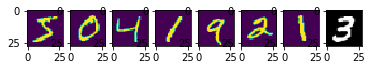

In [4]:
columns = 8
fig = plt.figure()
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [5]:
np.shape(y_train)

(60000,)

In [6]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [7]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [8]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [9]:
x_train_1D[0][0:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train_1D, y=y_train_onehot, epochs=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.9571 - acc: 0.7597
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4956 - acc: 0.8785
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.4024 - acc: 0.8970
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3545 - acc: 0.9069
Epoch 5/10
13300/60000 [=====>........................] - ETA: 1s - loss: 0.3284 - acc: 0.9133

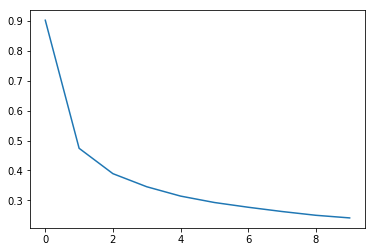

In [12]:
plt.plot(train_history.history['loss'])

In [13]:
np.shape(x_test)

(10000, 28, 28)

In [14]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_norm = x_test_1D/255

In [15]:
y_test_onehot = np_utils.to_categorical(y_test) 

In [16]:
model.evaluate(x=x_test_1D, y=y_test_onehot)

10000/10000 [==============================] - 0s 41us/step


[0.24316340296864511, 0.93049999999999999]

In [17]:
model.predict(x_test_1D[0:1,:])

array([[  5.03246556e-04,   2.62649810e-05,   5.27281896e-04,
          1.40515144e-03,   5.82336288e-05,   8.02849681e-05,
          9.24001506e-06,   9.95998383e-01,   1.25572376e-04,
          1.26631383e-03]], dtype=float32)

In [18]:
model.predict_classes(x_test_1D[0:1,:])

array([7])

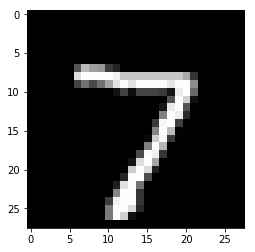

In [19]:
plt.imshow(x_test[0])